<a href="https://colab.research.google.com/github/IvanGoyena/Sarkany/blob/main/Guardado_Proveedor/Informe_Guardado_DEV_A_PROV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import files

## Carga de Archivos de la carpeta de Windows

In [56]:
uploaded = files.upload()

Saving Stock.xlsx to Stock.xlsx


In [57]:
uploaded = files.upload()

Saving Ubicaciones.xlsx to Ubicaciones.xlsx


In [58]:
uploaded = files.upload()

Saving 1.4 MAESTRO_ARTICULOS_LOGISTICA - COMPLETO.xlsx to 1.4 MAESTRO_ARTICULOS_LOGISTICA - COMPLETO.xlsx


## Lectura de los Arhivos

In [59]:
# 1. Cargar archivos
Maestro = pd.read_excel('1.4 MAESTRO_ARTICULOS_LOGISTICA - COMPLETO.xlsx',skiprows=6)
Ubicaciones = pd.read_excel('Ubicaciones.xlsx')
Stock = pd.read_excel('Stock.xlsx')

## Tansformaciones Realizadas

In [60]:
import pandas as pd
## 1) TRANSFORMACIONES TABLA STOCK


# Lista de columnas a eliminar
columnas_a_eliminar = [
    'Pasillo', 'Zona', 'Orden de salida', 'Proveedor',
    'Estado', 'Carro', 'Paquete', 'Y', 'X', 'Particiones'
]

# Eliminar las columnas del DataFrame
Stock = Stock.drop(columns=columnas_a_eliminar)



## 2) TRANSFORMACIONES TABLA MAESTRO

# Lista de columnas a eliminar
columnas_a_eliminar = [
    'CODIGO', 'CODIGO_MODELO', 'MODELO + COLOR', 'CODIGO_DESCRIPCION',
    'TEMPORADA', 'RUBRO', 'SUBRUBRO', 'TEMPORADA_ORIGEN', 'COLOR',
    'NOMBRE_FANTASIA', 'ESTILO', 'FAMILIA', 'GRUPO',
    'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
    'TALLE','MARCA'
]

# Eliminar las columnas del DataFrame
Maestro = Maestro.drop(columns=columnas_a_eliminar, errors='ignore')
Maestro = Maestro.dropna(subset=['PROVEEDOR'])


In [61]:
## EXTRACCION DE DATOS DE OTRAS TABLAS

# Extraer solo la columna clave y PROVEEDOR
maestro_subset = Maestro[['CODIGO_BARRAS', 'PROVEEDOR']]

# Realizar el merge
Stock = Stock.merge(maestro_subset, left_on='Artículo', right_on='CODIGO_BARRAS', how='left')

# Eliminar la columna duplicada de clave que vino del merge
Stock = Stock.drop(columns=['CODIGO_BARRAS'])

# Si existe una columna duplicada de proveedor, eliminala
if 'PROVEEDOR_x' in Stock.columns and 'PROVEEDOR_y' in Stock.columns:
    Stock = Stock.drop(columns=['PROVEEDOR_x'])
    Stock = Stock.rename(columns={'PROVEEDOR_y': 'PROVEEDOR'})
elif 'PROVEEDOR_y' in Stock.columns:
    Stock = Stock.rename(columns={'PROVEEDOR_y': 'PROVEEDOR'})


    # Extraer solo columnas necesarias de Ubicaciones
ubicaciones_subset = Ubicaciones[['Razon Social', 'Ubicación']]

# Hacer el merge usando la columna PROVEEDOR como clave
Stock = Stock.merge(ubicaciones_subset, left_on='PROVEEDOR', right_on='Razon Social', how='left')

# Drop the redundant 'Razon Social' column after merge
Stock = Stock.drop(columns=['Razon Social'])


# If there's a duplicate 'Ubicacion' column, rename the new one
if 'Ubicacion_x' in Stock.columns and 'Ubicación_y' in Stock.columns:
    Stock = Stock.drop(columns=['Ubicacion_x'])
    Stock = Stock.rename(columns={'Ubicación_y': 'Ubicacion'})
elif 'Ubicación_y' in Stock.columns:
    Stock = Stock.rename(columns={'Ubicación_y': 'Ubicacion'})

## Reordenamiento y Visualizacion

In [62]:
Stock = Stock.sort_values(by='Ubicacion')
Stock.head()

,Artículo,Cantidad,Ubicación_x,Contenedor,Estado de usuario,PROVEEDOR,Ubicacion
5,1S5ICMADY%NG37,1,CARRO_CROSS_03,168373,ARREGLOS,ESGOLUSE S.A.,PA-08-A-01-01
9,1S5ISDISSA%NG37,1,CARRO_CROSS_03,168373,ARREGLOS,ESGOLUSE S.A.,PA-08-A-01-01
32,1S5IPMAJE%XC37,1,CARRO_CROSS_03,168373,ARREGLOS,LEONARDO BELLINI SA,PA-08-B-01-01
24,1S5ICPRAP%NG39,2,CARRO_CROSS_03,168373,ARREGLOS,LEONARDO BELLINI SA,PA-08-B-01-01
10,1S5ISGRIND%NG39,1,CARRO_CROSS_03,168373,ARREGLOS,LEONARDO BELLINI SA,PA-08-B-01-01


## Guardado en archivo CSV

In [63]:
Stock.to_csv('Informe_Guardado_DEV_A_PROV.csv', index=False, encoding='utf-8')


## Grafico de Barras por Proveedor

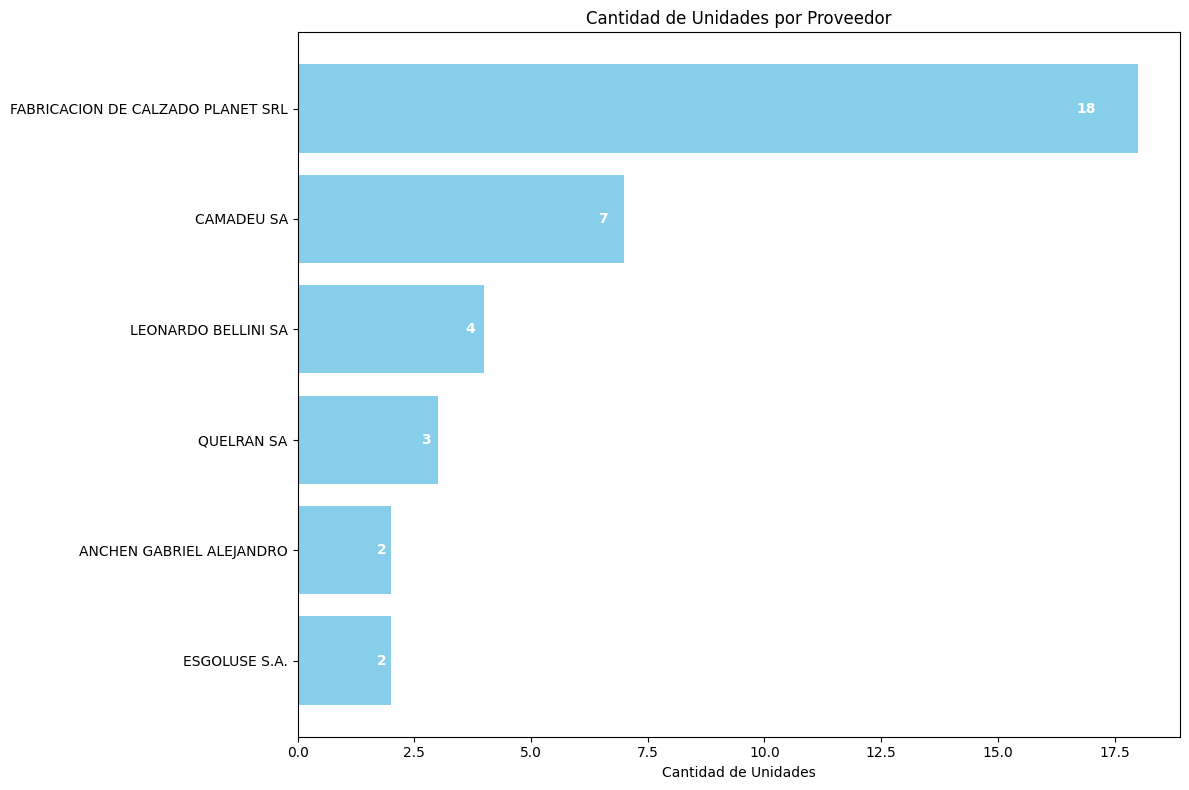

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
bars = plt.barh(cantidad_por_proveedor['PROVEEDOR'], cantidad_por_proveedor['Cantidad'], color='skyblue')
plt.xlabel('Cantidad de Unidades')
plt.title('Cantidad de Unidades por Proveedor')
plt.gca().invert_yaxis()  # Para que el proveedor con más unidades quede arriba

# Agregar etiquetas con los valores dentro de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(
        width - (width * 0.05),  # Un poco antes del final de la barra
        bar.get_y() + bar.get_height()/2,
        f'{int(width)}',
        ha='right',  # Alineado a la derecha para que quede dentro de la barra
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

